# **MÓDULO 17 - AULA 3**
# Correlação

Vamos começar nossa aula utilizando a base que desenvolvemos no módulo 15.
Então baixaremos o dataframe com as alterações feitas na aula e subiremos nesse notebook.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
#Scikit-learn é uma biblioteca popular de código aberto em Python para aprendizado de máquina. Ele fornece uma ampla gama de algoritmos de aprendizado supervisionado e não supervisionado, além de utilitários para pré-processamento de dados, seleção de modelos, avaliação de desempenho e muito mais.

In [2]:
df = pd.read_csv("CHURN_CREDIT_MOD08_PART3.csv", delimiter=',')

df.head(10)

,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,677,SPAIN,Male,18.0,5,134796.87,2,1.0,0.0,1011687.0,0.0
1,644,SPAIN,Female,18.0,7,0.00,1,0.0,1.0,1011687.0,0.0
2,641,SPAIN,Male,18.0,1,0.00,2,0.0,1.0,1011687.0,0.0
3,826,SPAIN,Male,18.0,2,0.00,2,0.0,1.0,1011687.0,0.0
4,774,SPAIN,Female,18.0,1,185891.54,1,1.0,0.0,1011687.0,0.0
5,688,SPAIN,Female,18.0,2,0.00,2,1.0,0.0,1011687.0,0.0
6,803,SPAIN,Male,18.0,6,0.00,1,0.0,0.0,1011687.0,1.0
7,578,SPAIN,Female,18.0,8,71843.15,2,0.0,1.0,1011687.0,0.0
8,598,SPAIN,Male,18.0,6,0.00,2,0.0,1.0,1011687.0,0.0
9,624,SPAIN,Female,18.0,6,0.00,2,0.0,1.0,1011687.0,0.0


Existem algumas técnicas principais que costumamos usar para analisar a correlação entre nossas variáveis, nessa aula exploraremos alguns desses métodos.
É importante sempre lembrar que a correlação que temos maior interesse é a das variáveis preditivas com a variável preditora.
Entretando a alta correlação (seja ela positiva ou negativa) entre as demais variáveis também tem valor para o modelo.

**1 - Matriz Correlação:**

In [3]:
df.select_dtypes(include=['number']).corr()

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
Credit_Score,1.000000,-0.005099,-0.000574,0.006731,0.012509,-0.000922,0.011416,-0.011707,-0.024580
Idade,-0.005099,1.000000,-0.013734,0.063713,-0.103867,-0.012933,0.000577,0.283716,0.345462
Tempo_Credito,-0.000574,-0.013734,1.000000,-0.010009,0.006161,0.003356,-0.003640,0.001665,-0.018667
Balanco,0.006731,0.063713,-0.010009,1.000000,-0.359141,-0.017978,-0.013325,-0.163486,0.129540
Qtd_Produtos,0.012509,-0.103867,0.006161,-0.359141,1.000000,0.002109,0.039489,-0.000220,-0.211684
Possui_Cartao,-0.000922,-0.012933,0.003356,-0.017978,0.002109,1.000000,-0.024726,0.006150,-0.021483
Membro_Ativo,0.011416,0.000577,-0.003640,-0.013325,0.039489,-0.024726,1.000000,-0.000160,-0.211063
Salario_Anual,-0.011707,0.283716,0.001665,-0.163486,-0.000220,0.006150,-0.000160,1.000000,0.031500
Churn,-0.024580,0.345462,-0.018667,0.129540,-0.211684,-0.021483,-0.211063,0.031500,1.000000


É importante notar que a correlação de Pearson, que é comumente usada para calcular a matriz de correlação linear, é mais apropriada para medir a relação linear entre variáveis numéricas contínuas.

**Notem que as variáveis categóricas (Sexo) não tem correlação calculada, por lógica não tem como calcularmos a correlação de uma variável numérica com uma palavra.**

**2 - Cluster Map:**

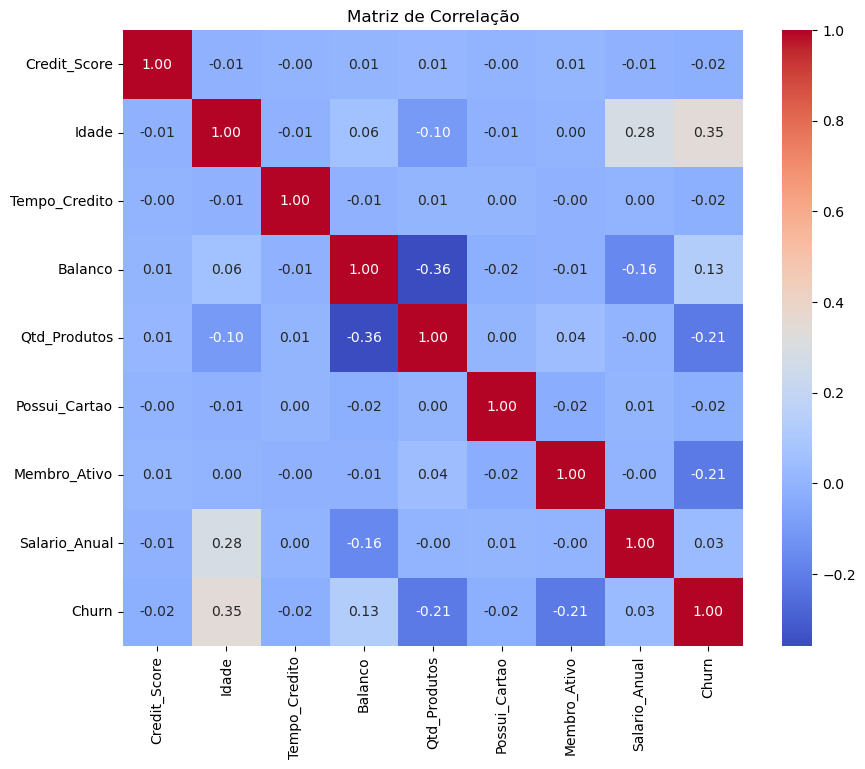

In [4]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

# **MÓDULO 17 - AULA 4**






# Atributos Categóricos

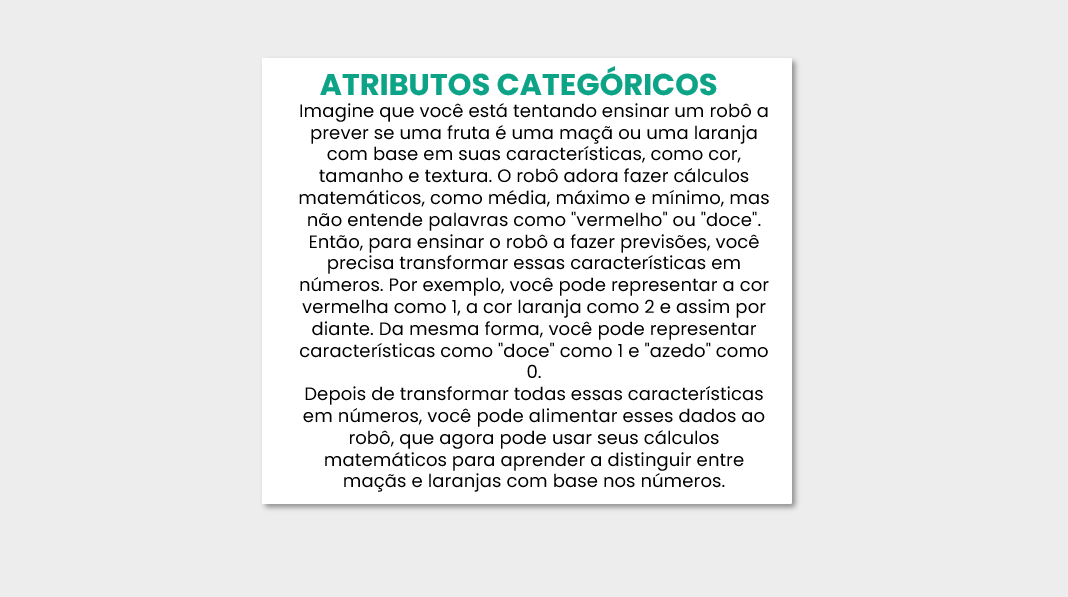

Já comentei no início do curso que os modelos de machine learning nada mais são do que conceitos estatísticos aplicados aos dados.
Como vimos no calculo de correlação não conseguimos aplicar a maioria dos conceitos automaticamente as palavras das variaveis categóricos, por isso é necessário fazer a transformação.


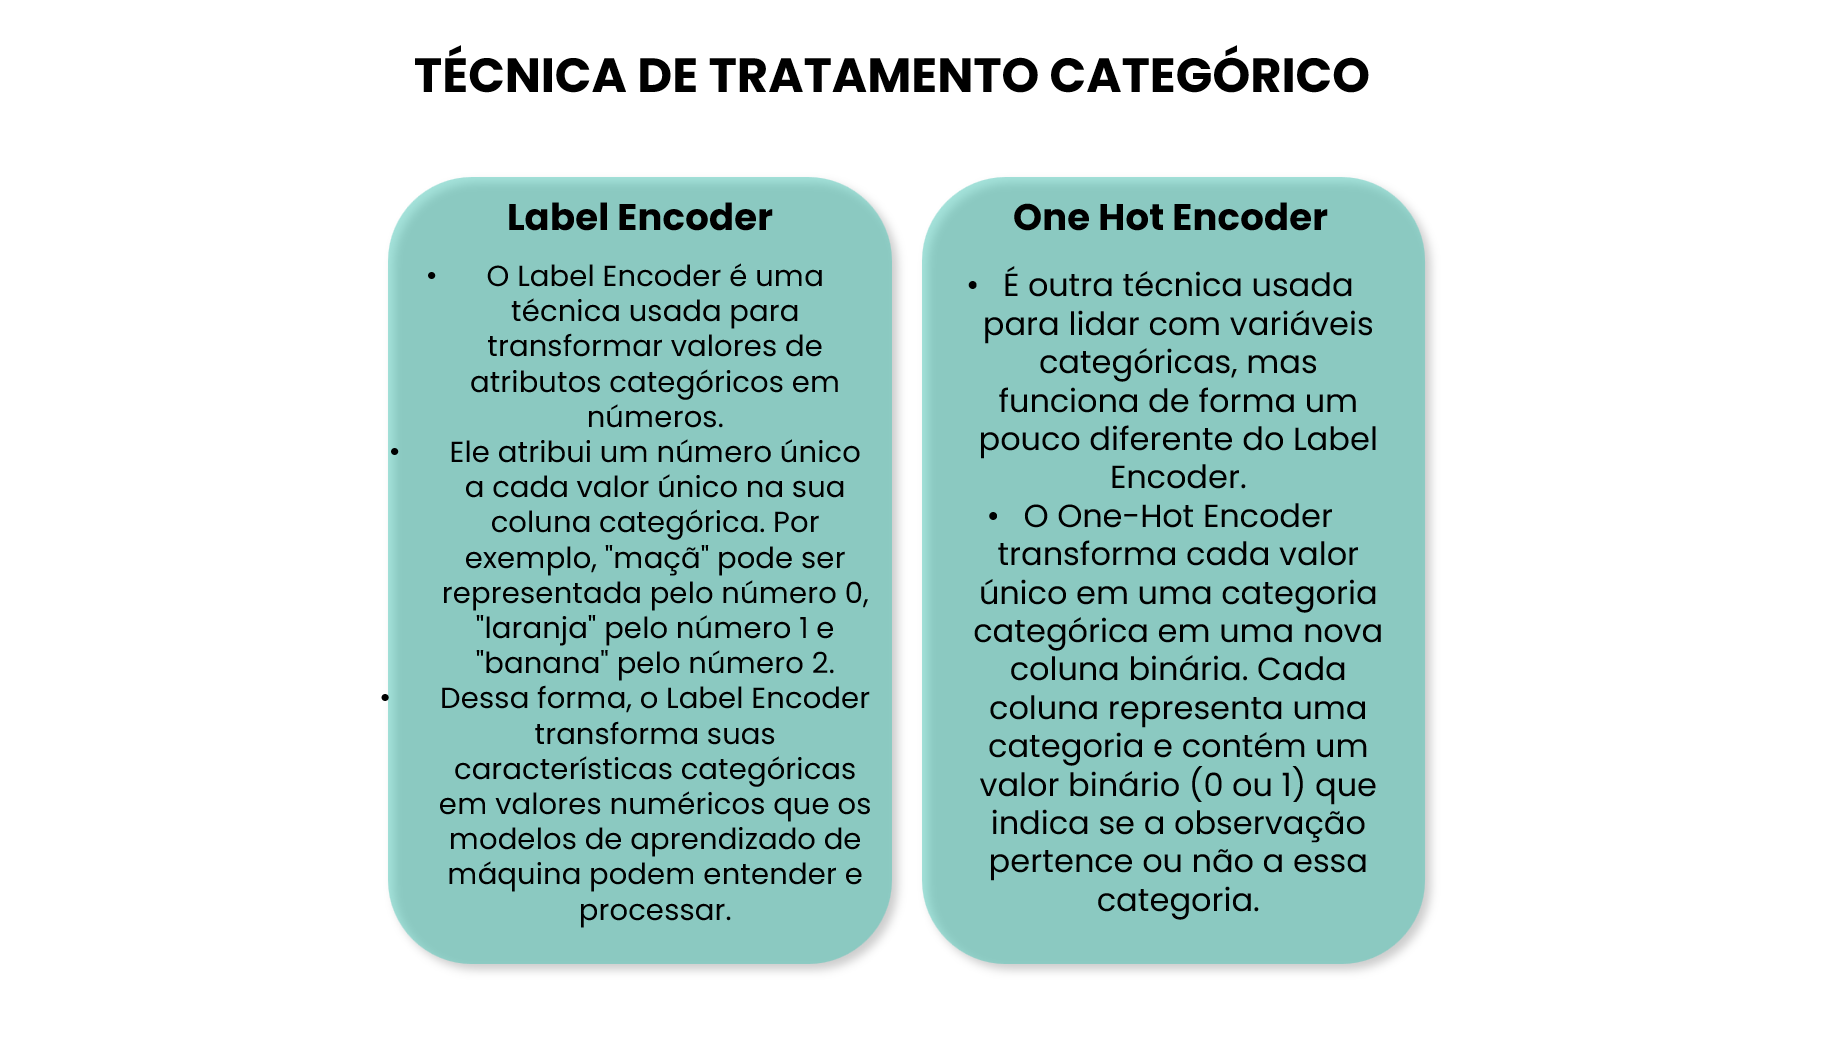

### Quando utilizar?

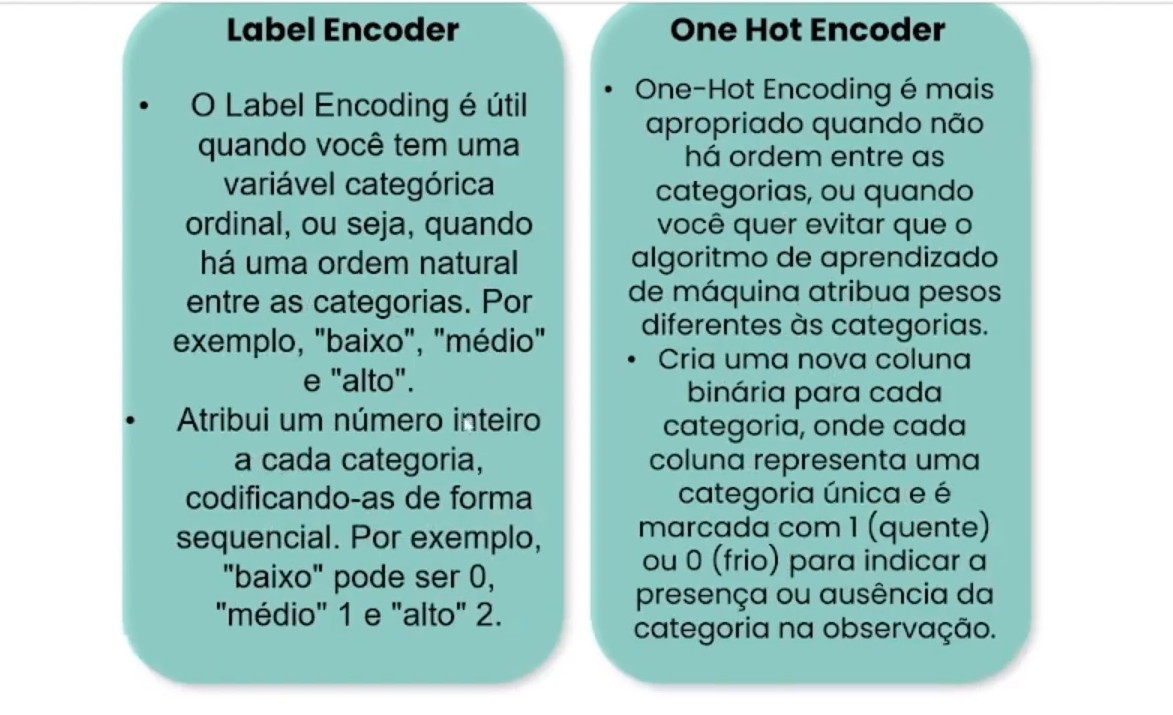

Para variáveis categóricas como "Pais", onde não há uma relação de ordem natural entre as categorias, é geralmente melhor usar One-Hot Encoding para evitar confusão no modelo.

Para variáveis como "Sexo" ou "Gênero", onde normalmente existem apenas duas categorias ("Masculino" e "Feminino"), a escolha entre Label Encoding e One-Hot Encoding pode depender de alguns fatores.

Label Encoding
Prós:

Simples de implementar.
Economiza memória, pois usa apenas uma coluna para representar a variável.

One-Hot Encoding
Prós:

Evita qualquer suposição de ordem entre os valores.
Pode ser interpretado de maneira mais neutra pelo modelo, sem implicações de ordem.

In [5]:
from sklearn.preprocessing import LabelEncoder

# Criando uma instância do Label Encoder
label_encoder = LabelEncoder()

# Aplicando o Label Encoder para a coluna "Genero" - ideal
df['Genero_encoded'] = label_encoder.fit_transform(df['Genero'])

# Aplicar o One Hot para a coluna "Pais" - Nesse caso não criamos instância
df = pd.get_dummies(df, columns=['Pais'], prefix='Pais', drop_first=True)
#pd.get_dummies(df, columns=['Pais'], prefix='Pais'): Esta função transforma a coluna "Pais" em várias colunas binárias (one-hot encoded)

print(df)

       Credit_Score  Genero  Idade  Tempo_Credito    Balanco  Qtd_Produtos  \
0               677    Male   18.0              5  134796.87             2   
1               644  Female   18.0              7       0.00             1   
2               641    Male   18.0              1       0.00             2   
3               826    Male   18.0              2       0.00             2   
4               774  Female   18.0              1  185891.54             1   
...             ...     ...    ...            ...        ...           ...   
99703           628    Male   83.0              8   56214.85             2   
99704           543    Male   92.0              6       0.00             2   
99705           752    Male   92.0              1  126076.24             2   
99706           820    Male   92.0              0       0.00             2   
99707           696    Male   92.0              9       0.00             1   

       Possui_Cartao  Membro_Ativo  Salario_Anual  Churn  Gener

Se você quiser evitar multicolinearidade, pode usar o argumento drop_first=True, que elimina uma das colunas resultantes. Isso é útil para modelos lineares que podem ser afetados pela multicolinearidade.

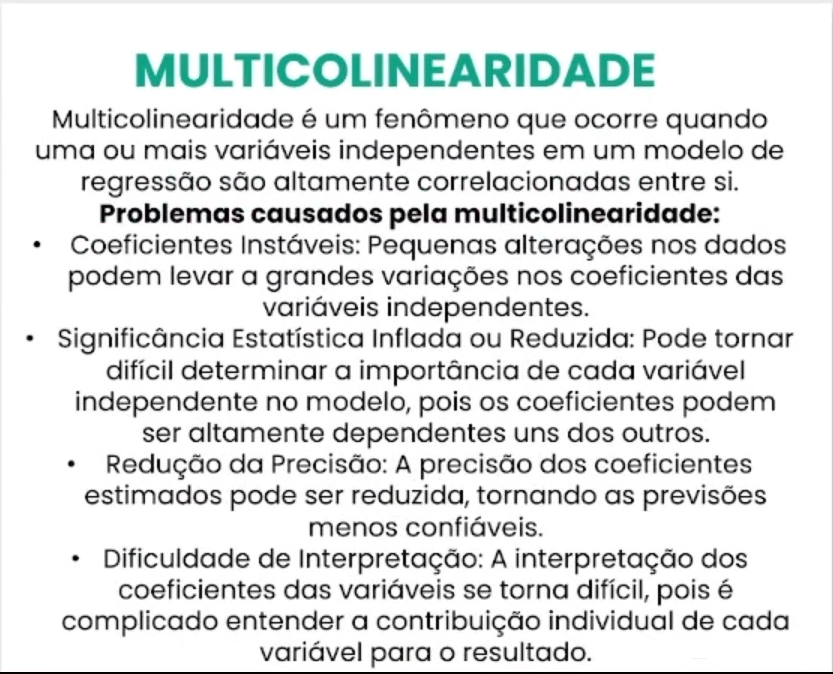

In [6]:
df.dtypes

Credit_Score        int64
Genero             object
Idade             float64
Tempo_Credito       int64
Balanco           float64
Qtd_Produtos        int64
Possui_Cartao     float64
Membro_Ativo      float64
Salario_Anual     float64
Churn             float64
Genero_encoded      int32
Pais_GERMANY         bool
Pais_SPAIN           bool
dtype: object

In [7]:
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)
df.head(10)

,Credit_Score,Genero,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn,Genero_encoded,Pais_GERMANY,Pais_SPAIN
0,677,Male,18.0,5,134796.87,2,1.0,0.0,1011687.0,0.0,1,0,1
1,644,Female,18.0,7,0.00,1,0.0,1.0,1011687.0,0.0,0,0,1
2,641,Male,18.0,1,0.00,2,0.0,1.0,1011687.0,0.0,1,0,1
3,826,Male,18.0,2,0.00,2,0.0,1.0,1011687.0,0.0,1,0,1
4,774,Female,18.0,1,185891.54,1,1.0,0.0,1011687.0,0.0,0,0,1
5,688,Female,18.0,2,0.00,2,1.0,0.0,1011687.0,0.0,0,0,1
6,803,Male,18.0,6,0.00,1,0.0,0.0,1011687.0,1.0,1,0,1
7,578,Female,18.0,8,71843.15,2,0.0,1.0,1011687.0,0.0,0,0,1
8,598,Male,18.0,6,0.00,2,0.0,1.0,1011687.0,0.0,1,0,1
9,624,Female,18.0,6,0.00,2,0.0,1.0,1011687.0,0.0,0,0,1


In [8]:
# Vamos dropar as colunas com os atributos categóricos
df = df.drop(['Genero'], axis=1)
print(df)

       Credit_Score  Idade  Tempo_Credito    Balanco  Qtd_Produtos  \
0               677   18.0              5  134796.87             2   
1               644   18.0              7       0.00             1   
2               641   18.0              1       0.00             2   
3               826   18.0              2       0.00             2   
4               774   18.0              1  185891.54             1   
...             ...    ...            ...        ...           ...   
99703           628   83.0              8   56214.85             2   
99704           543   92.0              6       0.00             2   
99705           752   92.0              1  126076.24             2   
99706           820   92.0              0       0.00             2   
99707           696   92.0              9       0.00             1   

       Possui_Cartao  Membro_Ativo  Salario_Anual  Churn  Genero_encoded  \
0                1.0           0.0      1011687.0    0.0               1   
1      

Podemos inclusive trazer a correlação dessas duas colunas, agora que não são mais atributos categóricos

In [9]:
df.corr()

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn,Genero_encoded,Pais_GERMANY,Pais_SPAIN
Credit_Score,1.000000,-0.005099,-0.000574,0.006731,0.012509,-0.000922,0.011416,-0.011707,-0.024580,0.002087,0.002644,0.007817
Idade,-0.005099,1.000000,-0.013734,0.063713,-0.103867,-0.012933,0.000577,0.283716,0.345462,-0.062781,0.094204,-0.006409
Tempo_Credito,-0.000574,-0.013734,1.000000,-0.010009,0.006161,0.003356,-0.003640,0.001665,-0.018667,0.008811,-0.007652,0.005808
Balanco,0.006731,0.063713,-0.010009,1.000000,-0.359141,-0.017978,-0.013325,-0.163486,0.129540,-0.015781,0.538309,-0.131893
Qtd_Produtos,0.012509,-0.103867,0.006161,-0.359141,1.000000,0.002109,0.039489,-0.000220,-0.211684,0.023714,-0.102636,0.027736
Possui_Cartao,-0.000922,-0.012933,0.003356,-0.017978,0.002109,1.000000,-0.024726,0.006150,-0.021483,0.006208,-0.008175,-0.015017
Membro_Ativo,0.011416,0.000577,-0.003640,-0.013325,0.039489,-0.024726,1.000000,-0.000160,-0.211063,0.035486,-0.034223,0.017031
Salario_Anual,-0.011707,0.283716,0.001665,-0.163486,-0.000220,0.006150,-0.000160,1.000000,0.031500,-0.008264,-0.298592,-0.305591
Churn,-0.024580,0.345462,-0.018667,0.129540,-0.211684,-0.021483,-0.211063,0.031500,1.000000,-0.146529,0.214270,-0.050841
Genero_encoded,0.002087,-0.062781,0.008811,-0.015781,0.023714,0.006208,0.035486,-0.008264,-0.146529,1.000000,-0.044477,0.009903


# **MÓDULO 17 - AULA 5**





# Separação entre base treino e teste

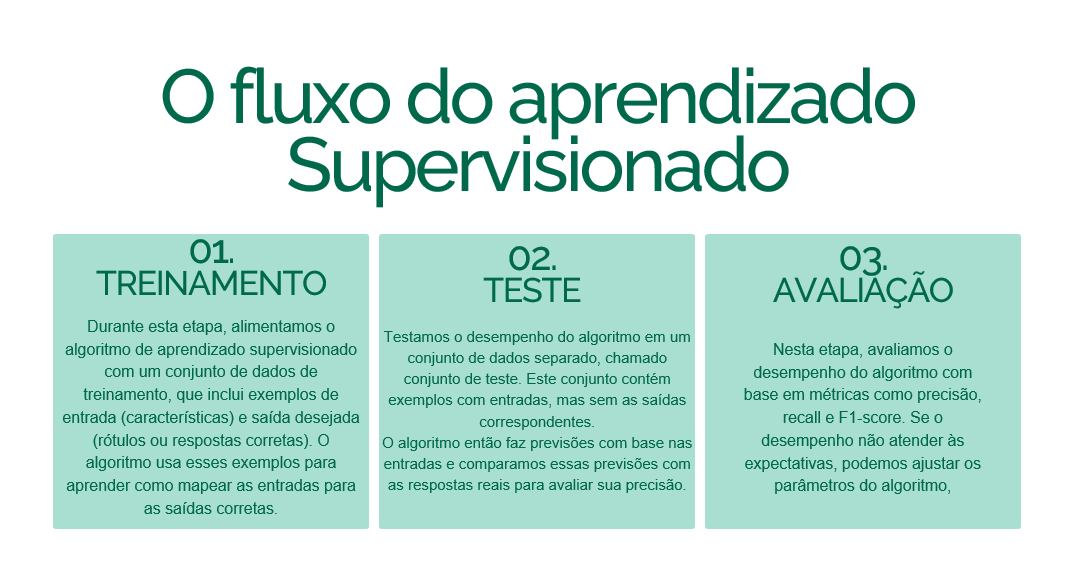

Como vimos no exemplo do cebolinha, necessitamos primeiro treinar nosso modelo com dados conhecidos e na etapa de dados, disponibilizar uma % dos dados que o modelo não conheça e que não contenha os dados de previsão, para que ele tente acertar e nós validemos esses valores.


Separar a base de dados em conjuntos de treino e teste é importante para avaliar o desempenho de um modelo de aprendizado de máquina de forma justa e confiável. Aqui estão algumas razões pelas quais essa separação é crucial:

**Avaliação do desempenho do modelo:** Ao separar os dados em treino e teste, podemos treinar o modelo nos dados de treinamento e avaliar seu desempenho nos dados de teste. Isso nos permite entender como o modelo generaliza para novos dados não vistos durante o treinamento.

**Prevenção de overfitting:** A separação dos dados ajuda a evitar o overfitting, que ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas não consegue generalizar para novos dados. Avaliar o modelo em um conjunto de dados de teste separado pode revelar se ele está sobreajustado aos dados de treinamento.

Overfitting é um fenômeno comum em modelos de aprendizado de máquina, onde o modelo se ajusta muito bem aos dados de treinamento, mas não consegue generalizar bem para novos dados que não foram vistos durante o treinamento. Isso significa que o modelo "decora" os dados de treinamento em vez de aprender os padrões subjacentes que podem ser aplicados a novos dados.

In [10]:
# Separar os dados em features (X) e o alvo (y)
X = df.drop('Churn', axis=1)  # Considerando que 'Churn' é a coluna a ser predita
y = df['Churn']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# O parâmetro 'test_size' determina a proporção dos dados que serão separados para teste (25% neste exemplo)
# O parâmetro 'random_state' é usado para garantir que a divisão seja reproduzível

Por padrão, a função train_test_split da biblioteca Scikit-learn divide os dados em conjuntos de treino e teste usando uma proporção de 75% para treino e 25% para teste. Isso significa que, por padrão, 75% dos dados serão usados para treinar o modelo e 25% serão usados para testá-lo.
No entanto, é importante ressaltar que você pode especificar essa proporção manualmente usando o parâmetro test_size. Por exemplo, se você quiser uma divisão diferente, pode especificar a porcentagem desejada, como 0.2 para 20% dos dados de teste e 80% dos dados de treinamento

Mais a frente no curso aprenderemos a cross validation onde a ideia básica por trás da validação cruzada é dividir o conjunto de dados em k subconjuntos (ou "folds") aproximadamente iguais. Em seguida, o modelo é treinado k vezes, cada vez usando k-1 dos subconjuntos como dados de treinamento e o subconjunto restante como dados de teste.
Então nem sempre separamos base treino e teste como demonstrado aqui, existem outras técnicas e % que podem ser utilizadas mas por padrão é seguido dessa maneira.

In [13]:
X_train

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_encoded,Pais_GERMANY,Pais_SPAIN
66440,711,35.0,10,0.00,2,1.0,0.0,5331178.0,1,0,0
59205,619,33.0,7,0.00,2,0.0,1.0,1011687.0,1,0,0
40951,841,54.0,4,102721.49,1,1.0,1.0,1011687.0,1,1,0
93972,679,48.0,6,125161.24,1,1.0,0.0,579659.0,1,0,0
86078,656,42.0,6,0.00,3,0.0,0.0,14233155.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6265,563,33.0,4,90727.79,2,0.0,0.0,1011687.0,1,0,1
54886,512,31.0,1,145150.28,2,1.0,0.0,1011687.0,0,0,0
76820,537,38.0,4,0.00,2,0.0,0.0,11389922.0,0,0,0
860,730,25.0,0,0.00,2,1.0,1.0,1011687.0,1,0,1


In [14]:
X_test

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_encoded,Pais_GERMANY,Pais_SPAIN
69750,686,36.0,3,95848.58,2,0.0,1.0,7144694.0,1,0,0
67722,703,35.0,1,0.00,1,1.0,1.0,14136462.0,1,0,0
928,730,26.0,6,0.00,1,1.0,1.0,1011687.0,1,0,1
59899,675,33.0,6,0.00,2,0.0,1.0,1011687.0,0,0,0
22189,754,24.0,3,121513.31,2,0.0,1.0,1011687.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11617,786,37.0,4,0.00,2,0.0,1.0,1011687.0,0,0,1
67934,592,35.0,7,122724.50,1,1.0,1.0,17773874.0,1,0,0
90891,645,45.0,7,121286.32,1,1.0,1.0,869372.0,1,0,0
38238,567,47.0,1,126447.40,1,1.0,0.0,1011687.0,0,1,0


In [15]:
y_train

66440    1.0
59205    0.0
40951    1.0
93972    1.0
86078    1.0
        ... 
6265     0.0
54886    0.0
76820    0.0
860      0.0
15795    1.0
Name: Churn, Length: 74781, dtype: float64

In [16]:
y_test

69750    0.0
67722    0.0
928      0.0
59899    0.0
22189    0.0
        ... 
11617    0.0
67934    0.0
90891    0.0
38238    1.0
5252     0.0
Name: Churn, Length: 24927, dtype: float64

In [17]:
print("Tamanho de X_train:", X_train.shape)

Tamanho de X_train: (74781, 11)


In [18]:
print("Tamanho de X_test:", X_test.shape)

Tamanho de X_test: (24927, 11)


In [19]:
print("Tamanho de y_train:", y_train.shape)

Tamanho de y_train: (74781,)


In [20]:
print("Tamanho de y_test:", y_test.shape)

Tamanho de y_test: (24927,)


# **MÓDULO 17 - AULA 6**
# Balanceamento dos dados - Smote

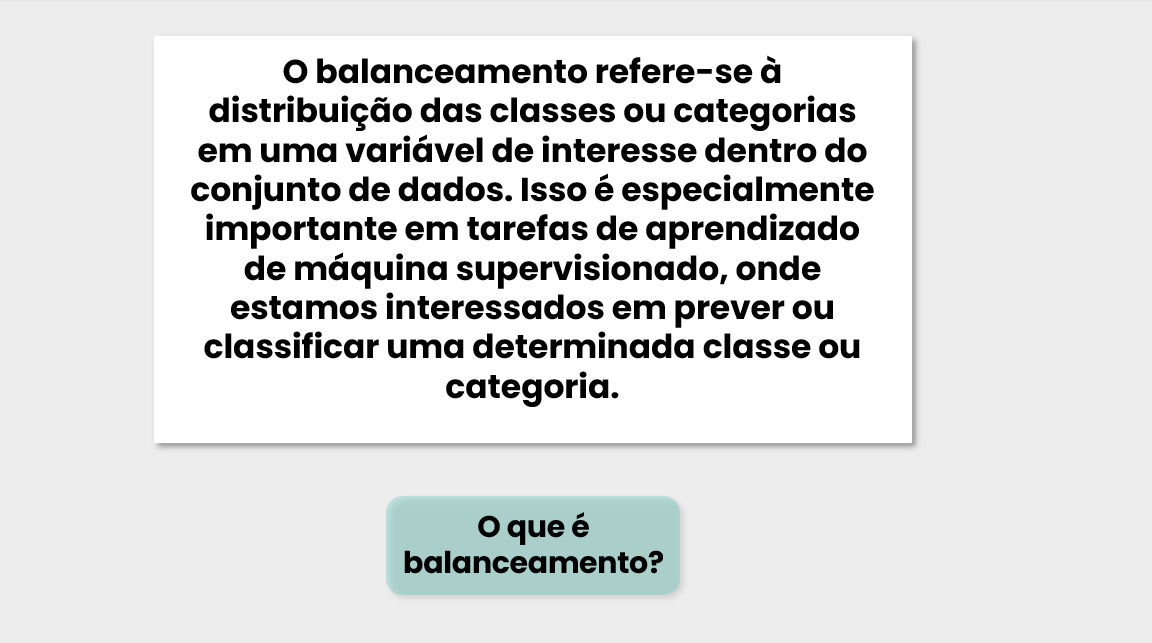

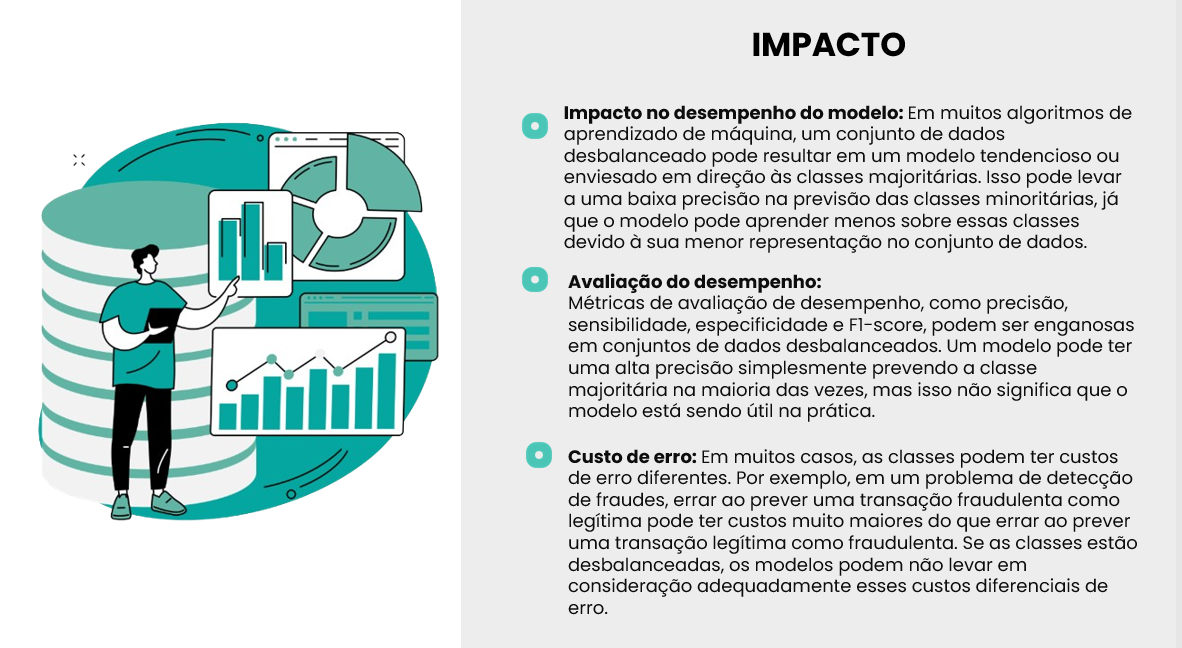

A primeira etapa é verificarmos como está o balanceamento da nossa variavel preditora, no caso, Churn.

Pois caso uma das classes esteja em baixa quantidade nosso modelo futuramente pode ter dificuldade para prever essa classe.

<Axes: xlabel='Churn'>

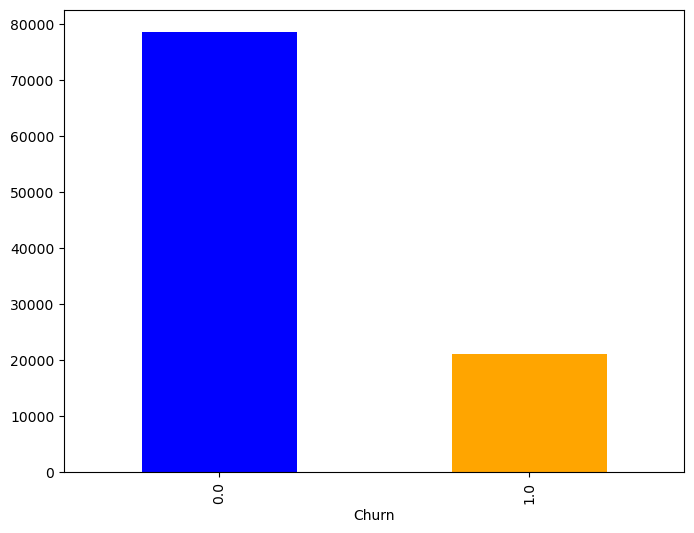

In [21]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['blue', 'orange'])

In [22]:
# Calcular e imprimir as porcentagens dos valores na coluna 'churn'
print((df['Churn'].value_counts(normalize=True) * 100))

Churn
0.0    78.854254
1.0    21.145746
Name: proportion, dtype: float64


Temos apenas 20% dos dados classificados como Churn e faz sentido o número de clientes que abandonaram a marca ser menor.
Entretanto isso pode indicar que se nosso modelo simplesmente "chutasse" que todos nossos clientes não dariam churn ele acertaria 80% dos casos e seria bem avaliado. Porém esse valor não é real para nós, pois nos interessa acertar o churn, por conta disso é interessante balancearmos nossos dados em casos como esses.

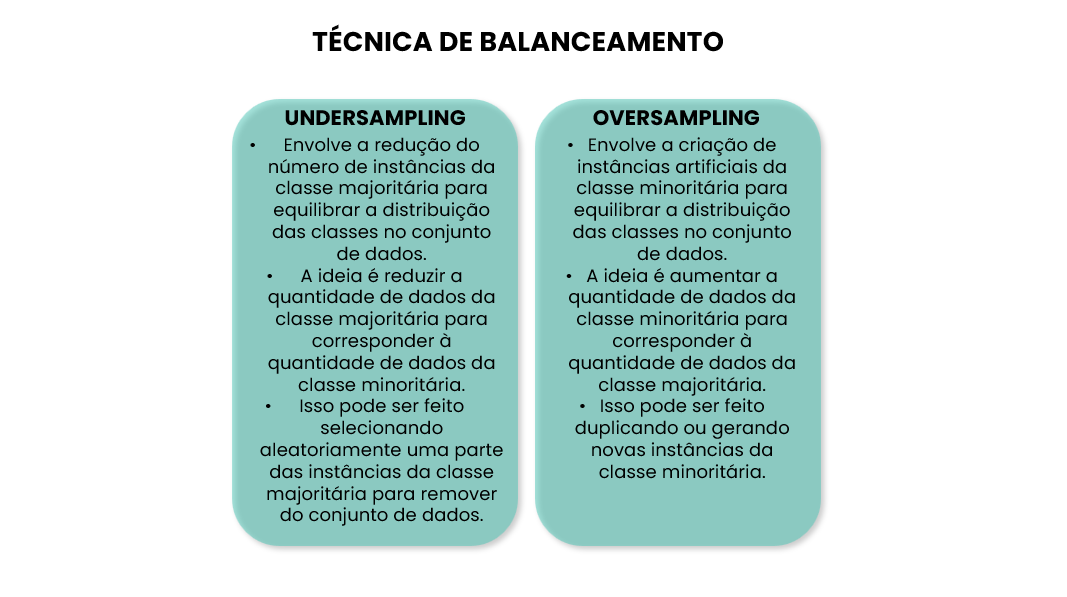

Idealmente aplicamos o balanceamento apenas na base de treino, em alguns casos podemos aplicar no teste mas imagine que, na vida real, quando nosso modelo for lidar com dados reais eles não estarão balanceados, então usaremos o balanceamento apenas no teste a nível de aprendizazdo do modelo.

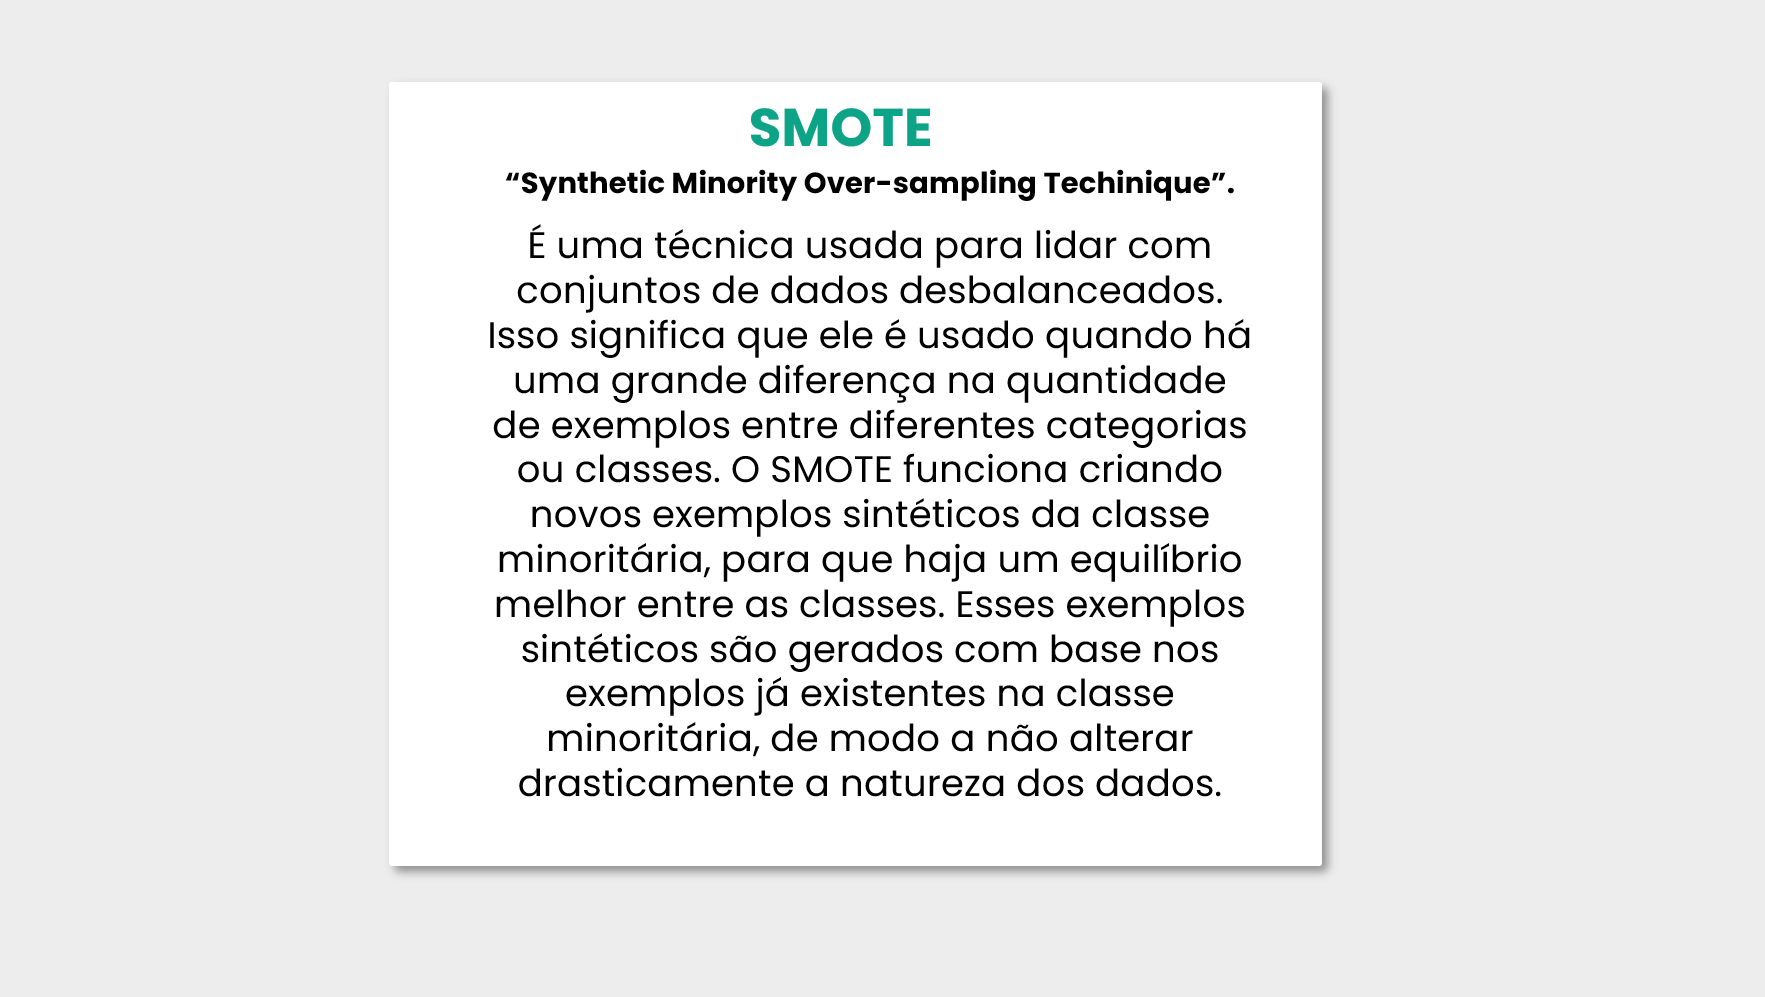

In [23]:
from imblearn.over_sampling import SMOTE

# Criar uma instância do SMOTE
smote = SMOTE(random_state=42)

# Aplicar o SMOTE aos dados de treinamento (X_train, y_train)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar a distribuição das classes após o balanceamento
print("Distribuição das classes após o balanceamento:")
print(y_train_balanced.value_counts())

Distribuição das classes após o balanceamento:
Churn
1.0    58975
0.0    58975
Name: count, dtype: int64


In [24]:
train_balance = y_train_balanced.value_counts()
print("Balanceamento em y_train:")
print(train_balance)

Balanceamento em y_train:
Churn
1.0    58975
0.0    58975
Name: count, dtype: int64


In [25]:
y_train_balanced.to_csv('y_train_balanced.csv', index=False)

In [26]:
X_train_balanced.to_csv('X_train_balanced.csv', index=False)

In [27]:
y_test.to_csv('y_test.csv', index=False)

In [28]:
X_test.to_csv('X_test.csv', index=False)